<a href="https://colab.research.google.com/github/avanegasp/unicatalu-a/blob/gh-pages/Billionaries_97_23_Angie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df_billion = pd.read_csv('https://raw.githubusercontent.com/avanegasp/All_billionaries_97_23/main/all_billionaires_1997_2023.csv')
df_billion.head(2)

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [ ]:
df_billion.shape

(31732, 19)

In [ ]:
df_billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      31732 non-null  int64  
 1   month                     31732 non-null  int64  
 2   rank                      31714 non-null  float64
 3   net_worth                 31732 non-null  object 
 4   last_name                 28043 non-null  object 
 5   first_name                27985 non-null  object 
 6   full_name                 31732 non-null  object 
 7   birth_date                27328 non-null  object 
 8   age                       31057 non-null  float64
 9   gender                    27903 non-null  object 
 10  country_of_citizenship    31723 non-null  object 
 11  country_of_residence      31030 non-null  object 
 12  city_of_residence         30797 non-null  object 
 13  business_category         25889 non-null  object 
 14  busine

## Eliminación de columnas

In [3]:
col_drop=['last_name', 'first_name', 'birth_date', 'organization_name', 'position_in_organization', 'business_category', 'wealth_status']
data = df_billion.drop(col_drop, axis=1)
data.head(2)

,year,month,rank,net_worth,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,self_made
0,1997,7,NaN,2.0 B,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],False
1,1997,7,NaN,1.8 B,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    31732 non-null  int64  
 1   month                   31732 non-null  int64  
 2   rank                    31714 non-null  float64
 3   net_worth               31732 non-null  object 
 4   full_name               31732 non-null  object 
 5   age                     31057 non-null  float64
 6   gender                  27903 non-null  object 
 7   country_of_citizenship  31723 non-null  object 
 8   country_of_residence    31030 non-null  object 
 9   city_of_residence       30797 non-null  object 
 10  business_industries     30742 non-null  object 
 11  self_made               28043 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.9+ MB


In [ ]:
type('rank')

str

In [ ]:
data.shape

(31732, 12)

In [4]:
 data.isnull().mean()*100

year                       0.000000
month                      0.000000
rank                       0.056725
net_worth                  0.000000
full_name                  0.000000
age                        2.127190
gender                    12.066683
country_of_citizenship     0.028363
country_of_residence       2.212278
city_of_residence          2.946552
business_industries        3.119879
self_made                 11.625488
dtype: float64

In [5]:
data_up = data.dropna(inplace=False)
#data_up.head(1)
type(data_up['age'])

pandas.core.series.Series

In [ ]:
data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26432 entries, 19 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26432 non-null  int64  
 1   month                   26432 non-null  int64  
 2   rank                    26432 non-null  float64
 3   net_worth               26432 non-null  object 
 4   full_name               26432 non-null  object 
 5   age                     26432 non-null  float64
 6   gender                  26432 non-null  object 
 7   country_of_citizenship  26432 non-null  object 
 8   country_of_residence    26432 non-null  object 
 9   city_of_residence       26432 non-null  object 
 10  business_industries     26432 non-null  object 
 11  self_made               26432 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.6+ MB


Se realiza la eliminación de los datos null que aún quedaban pero no se modifica el dataset original por eso se coloca False.

In [ ]:
data_up.describe()

,year,month,rank,age
count,26432.000000,26432.000000,26432.000000,26432.000000
mean,2017.220906,3.374470,984.890360,63.300696
std,4.345251,0.503609,645.481543,13.427911
min,2001.000000,2.000000,1.000000,0.000000
25%,2014.000000,3.000000,451.000000,54.000000
50%,2018.000000,3.000000,896.000000,63.000000
75%,2021.000000,4.000000,1445.000000,73.000000
max,2023.000000,7.000000,2674.000000,101.000000


In [ ]:
data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26432 entries, 19 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26432 non-null  int64  
 1   month                   26432 non-null  int64  
 2   rank                    26432 non-null  float64
 3   net_worth               26432 non-null  object 
 4   full_name               26432 non-null  object 
 5   age                     26432 non-null  float64
 6   gender                  26432 non-null  object 
 7   country_of_citizenship  26432 non-null  object 
 8   country_of_residence    26432 non-null  object 
 9   city_of_residence       26432 non-null  object 
 10  business_industries     26432 non-null  object 
 11  self_made               26432 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.6+ MB


In [ ]:
data_up.describe()

,year,month,rank,age
count,26432.000000,26432.000000,26432.000000,26432.000000
mean,2017.220906,3.374470,984.890360,63.300696
std,4.345251,0.503609,645.481543,13.427911
min,2001.000000,2.000000,1.000000,0.000000
25%,2014.000000,3.000000,451.000000,54.000000
50%,2018.000000,3.000000,896.000000,63.000000
75%,2021.000000,4.000000,1445.000000,73.000000
max,2023.000000,7.000000,2674.000000,101.000000


In [ ]:
data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26432 entries, 19 to 31731
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26432 non-null  int64  
 1   month                   26432 non-null  int64  
 2   rank                    26432 non-null  float64
 3   net_worth               26432 non-null  object 
 4   full_name               26432 non-null  object 
 5   age                     26432 non-null  float64
 6   gender                  26432 non-null  object 
 7   country_of_citizenship  26432 non-null  object 
 8   country_of_residence    26432 non-null  object 
 9   city_of_residence       26432 non-null  object 
 10  business_industries     26432 non-null  object 
 11  self_made               26432 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.6+ MB


In [ ]:
unique_data = data_up.nunique()
unique_data

year                        23
month                        5
rank                       834
net_worth                  530
full_name                 4473
age                         85
gender                       2
country_of_citizenship      85
country_of_residence        89
city_of_residence         1035
business_industries         40
self_made                    2
dtype: int64

In [ ]:
unique_values = data_up['age'].unique()
print(unique_values)

[ 45.  48.  81.  58.  63.  52.  71.  51.  55.  76.  82.  57.  53.  78.
  65.  62.  54.  37.  77.  67.  69.  73.  64.  60.  42.  46.  49.  59.
  83.  72.  79.  66.  56.  38.  35.  74.  47.  50.  80.  84.  39.  70.
  43.  68.  75.  40.  61.  44.  85.  41.  86.  87.  88.  90.  36.  89.
  92.  34.  91.  93.   0.  95.  98.  25.  28.  94.  26.  31.  29.  33.
  27.  32.  30.  96.  97.  24.  19.  20.  22.  23.  21.  99. 100. 101.
  18.]


In [ ]:
data_up.head(1)

,year,month,rank,net_worth,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,self_made
19,2001,7,1.0,58.7 B,Bill Gates,45.0,Male,United States,United States,Medina,['Technology'],False


## Análisis univariado

### Histograma para comparar categorías


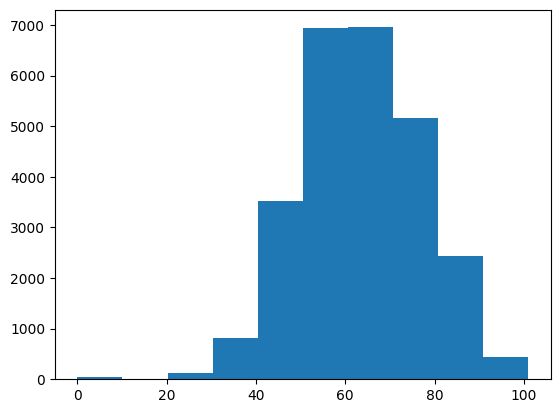

In [ ]:
plt.hist(data_up['age'])
plt.show()

Histplot para buscar tendencias a lo largo del tiempo (ayuda a localizar datos atípicos) pero este no es su fin.

<Axes: xlabel='age', ylabel='Count'>

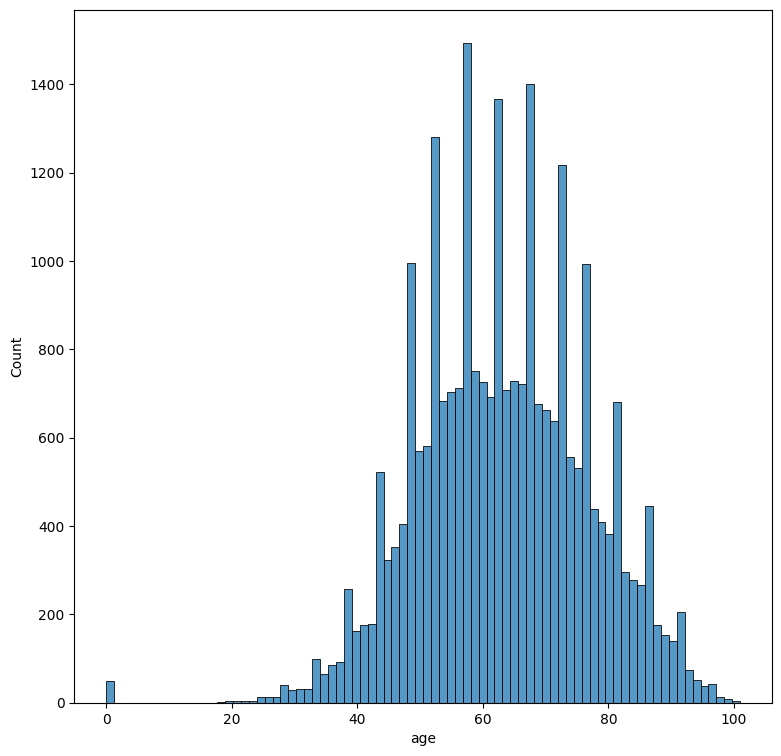

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.histplot(data = data_up, x='age')

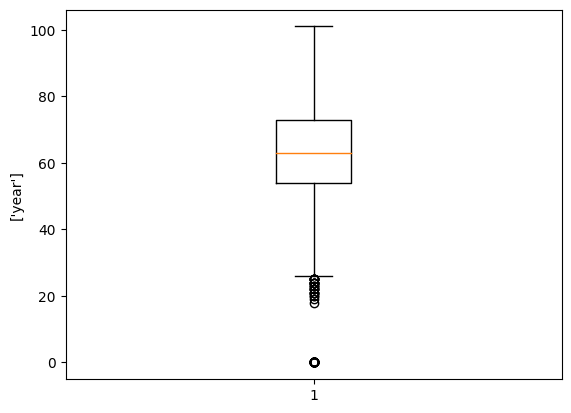

In [ ]:
plt.boxplot(data_up['age']) # Se determinar el tipo de gráfica a realizar y se pasan los datos

plt.ylabel(['year']) # Se añaden tantos elementos como se desee

plt.show();

Por medio de este gráfico de caja y bigotes o boxplot se ve una distribución símetrica en edades de 63 años (mediana) o sea que la media, mediana y moda coinciden.
El rango intercuartilico está entre 55 años y 75 años

Tenemos valores atípicos inferiores desde los 18 años y son 50 personas

In [ ]:
df_filter_age = data_up[data_up['age'] < 18]
df_filter_age.count()
#print(df_filter_age)

year                      50
month                     50
rank                      50
net_worth                 50
full_name                 50
age                       50
gender                    50
country_of_citizenship    50
country_of_residence      50
city_of_residence         50
business_industries       50
self_made                 50
dtype: int64

In [ ]:
median_age = data_up['age'].median()
median_age

63.0

In [ ]:
media_age = data_up['age'].mean()
media_age

63.30069612590799

## Gráfico de densidad de kernel
Son excelentes para determinar la forma de distribución.
Los picos ayudan a mostrar dónde los valores se concentran en el intervalo.

Esta curva esta sesgada a la izquierda y es bimodal osea que tiene 2 picos.

Pero haciendo los cálculos externos de la moda y mediana de este grupo de datos, podemos ver que son iguales, así que podemos concluir que esta curva NO debería tener sesgo y que los datos atípicos están dando una mala interpretación.

<Axes: xlabel='age', ylabel='Density'>

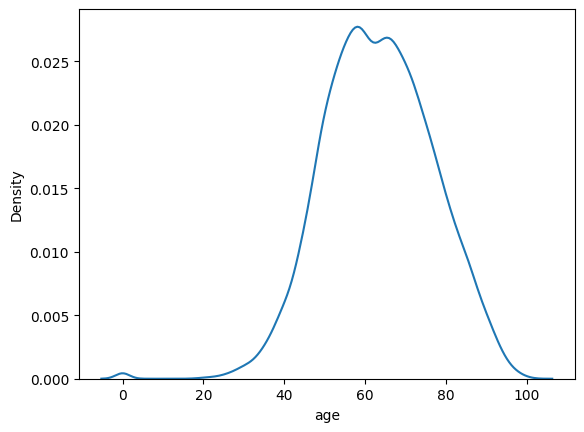

In [ ]:
sns.kdeplot(data_up['age'])

## Gender


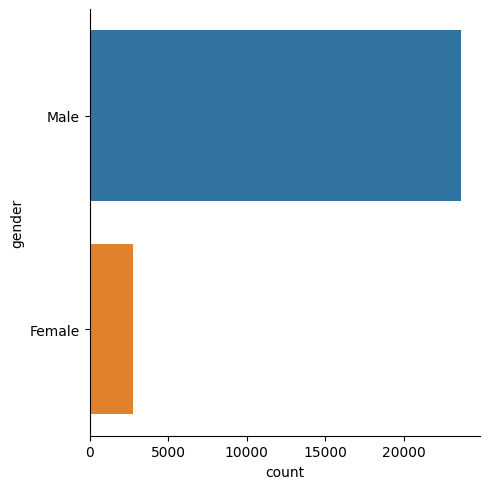

In [6]:
sns.catplot(data=data_up, y='gender', kind='count')

## Gender vs Self_made

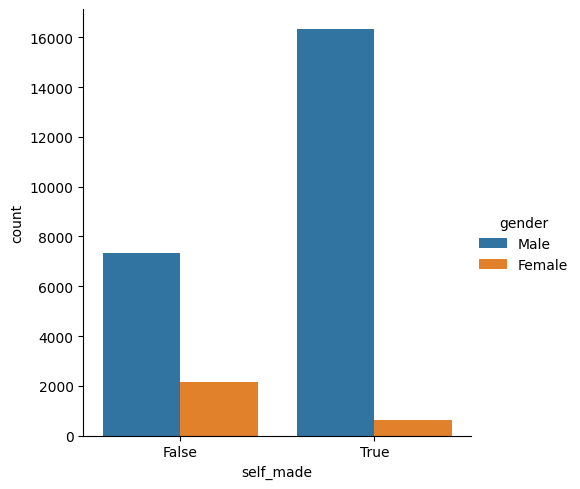

In [ ]:
sns.catplot(x='self_made', data = data_up, kind='count', hue='gender')

In [ ]:
(data_up['gender'].value_counts(normalize=True)*100)

Male      89.482446
Female    10.517554
Name: gender, dtype: float64

<Axes: xlabel='age'>

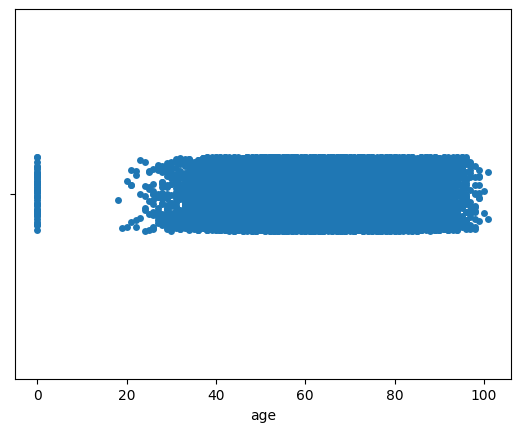

In [ ]:
sns.stripplot(data=data_up, x='age')